## Теория

### Без регуляризации
Так как функция потерь выглядит довольно просто:
\begin{equation}
Q(\mathbf{W}) = \frac{1}{n}||\mathbf{XW} - \mathbf{Y}||_{L1},
\end{equation}
где X $-$ регрессоры, W $-$ вектор весов, Y $-$ истинные прогнозируемые значения,
то можно вычислить градиент аналитическим путём. Для начала следует представить функцию потерь следующим образом:
\begin{equation}
Q(\mathbf{W}) = \frac{1}{n}||\mathbf{XW} - \mathbf{Y}||_{L1} = \frac{1}{n}\sum_{i=1}^n |⟨\mathbf{X_i, W} ⟩ - \mathbf{Y_i}|,
\end{equation}

где $\mathbf{X_i} - $ вектор признаков i-го объекта.

Её производная по первой компоненте приращения равна:
\begin{equation}
\frac{\partial Q(\mathbf{W})}{\partial h_1} = \frac{ \partial [\frac{1}{n}\sum_{i=1}^n |⟨\mathbf{X_i, W} ⟩ - \mathbf{Y_i}|]}{\partial h_1} = \frac{\partial [\frac{1}{n}\sum_{i=1}^n |X_{i1}h_1 + C_i|]}{\partial h_1} = \frac{1}{n} \sum_{i=1}^{n} \operatorname{sign}(X_{i1}h_1 + C_i)X_{i1} = \frac{1}{n} \sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{i1},
\end{equation}
где $C_i = ⟨\mathbf{X_i}, \mathbf{W} ⟩ - X_{i1}h_1 - \mathbf{Y_i}$,

$X_{i1} - $ значение первого признака i-го объекта выборки.

Аналогично можно найти приращения и по остальным компонентам вектора $\mathbf{W}$. Тогда градиент примет следующий вид:
\begin{equation}
∇ Q(\mathbf{W}) =
\begin{pmatrix}
\frac{\partial Q(\mathbf{W})}{\partial h_1} \\
\frac{\partial Q(\mathbf{W})}{\partial h_2} \\
\vdots \\
\frac{\partial Q(\mathbf{W})}{\partial h_m} \\
\end{pmatrix}
= \frac{1}{n}
\begin{pmatrix}
\sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{i1} \\
\sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{i2} \\
\vdots \\
\sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{im} \\
\end{pmatrix}
\end{equation}

## Регуляризация ElasticNet (обобщение L1, L2 и отсутствия регуляризации):

\begin{equation}
Q(\mathbf{W}) = \frac{1}{n}||\mathbf{XW} - \mathbf{Y}||_{L1} + \lambda_1 \sum_{i=1}^{m}|\omega_i| + \lambda_2 \sum_{i=1}^{m}\omega_i^2,
\end{equation}
где

\begin{equation}
\mathbf{W} =
\begin{pmatrix}
\omega_1 \\
\vdots \\
\omega_m \\
\end{pmatrix}
\end{equation}

Тогда градиент примет следующий вид:
\begin{equation}
∇ Q(\mathbf{W}) =
\begin{pmatrix}
\frac{\partial Q(\mathbf{W})}{\partial h_1} \\
\frac{\partial Q(\mathbf{W})}{\partial h_2} \\
\vdots \\
\frac{\partial Q(\mathbf{W})}{\partial h_m} \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{n} \sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{i1} + \lambda_1 \operatorname{sign}(\omega_1) +2\lambda_2 \omega_1 \\
\frac{1}{n} \sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{i2} + \lambda_1 \operatorname{sign}(\omega_2) +2\lambda_2 \omega_2\\
\vdots \\
\frac{1}{n} \sum_{i=1}^{n}\operatorname{sign}(⟨\mathbf{X_i}, \mathbf{W} ⟩ - \mathbf{Y_i})X_{im} + \lambda_1 \operatorname{sign}(\omega_m) +2\lambda_2 \omega_m\\
\end{pmatrix}
\end{equation}


## Класс с решением

In [ ]:
import numpy as np

class GradientDescent:

    def __init__(
            self,
            n_epoch=5000,
            tol=1e-4,
            fit_intercept=True,
            lambda_l1 = 0,
            lambda_l2 = 0,
            alpha = 1e-2
            ):
        self.n_epoch = n_epoch
        self.lambda_l1 = lambda_l1
        self.lambda_l2 = lambda_l2
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.alpha = alpha

    #параметр w позволяет задать начальное приближение весов вручную,
    #а не автоматически, что пригодится в сравнении моделей при отсутствии
    #регуляризаций и при их наличии

    def fit(self, X, y, w=None):
        if self.fit_intercept:
            X = np.insert(X, 0, 1, axis=1)
        if w is None:
            w = np.array([np.random.rand() for i in range(len(X[0]))])
        for epoch in range(self.n_epoch):
            sign_vec = np.array([np.sign(X[i] @ w - y[i])
                                for i in range(len(X))])
            gradient = np.array([sign_vec @ X[:, i]
                                for i in range(len(X[0]))]) / len(X)
            if self.lambda_l1 != 0:
                gradient += self.lambda_l1 * np.sign(w)
            if self.lambda_l2 != 0:
                gradient += 2 * self.lambda_l2 * w
            prev_w = w.copy()
            w = w - self.alpha * gradient
            if (np.abs(prev_w - w)).all() < self.tol:
                break
        if self.fit_intercept:
            self.intercept_ = w[0]
            self.coef_ = w[1:]
        else:
            self.intercept_ = 0
            self.coef_ = w

    def predict(self, X):
        return np.matmul(X, self.coef_) + self.intercept_

## Тест №1

coeffs = [3.14678252]
intercept = 3.719657142857094


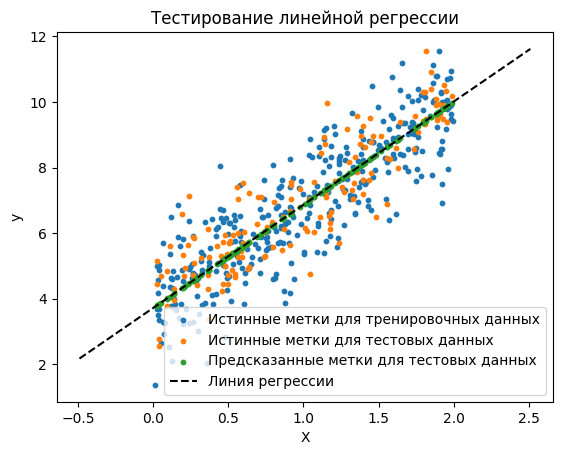

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2 * np.random.rand(500, 1)
y = (4 + 3 * X + np.random.randn(500,1))[:, 0]
gd = GradientDescent() # нет регуляризации
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3
)
w = np.array([0, 0])
gd.fit(X_train, y_train, w)
y_pred = gd.predict(X_test)
plt.scatter(X_train, y_train, s=10, label='Истинные метки для тренировочных данных')
plt.scatter(X_test, y_test, s=10, label='Истинные метки для тестовых данных')
plt.scatter(X_test, y_pred, s=10, label='Предсказанные метки для тестовых данных')
line_x = np.arange(min(X[:, 0])-0.5, max(X[:, 0])+1.5)
plt.plot(line_x, gd.predict(line_x.reshape(-1, 1)), label='Линия регрессии',
         c='k', linestyle='dashed')
print(f"coeffs = {gd.coef_}")
print(f"intercept = {gd.intercept_}")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Тестирование линейной регрессии')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mae: 0.7036659754123934
r2: 0.7821504850615921


In [ ]:
gd = GradientDescent(lambda_l1=0.01) #L1-регуляризация
gd.fit(X_train, y_train, w)
y_pred = gd.predict(X_test)
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mae: 0.7019668859002856
r2: 0.783170452203524


In [ ]:
gd = GradientDescent(lambda_l2=0.0001) #L2-регуляризация
gd.fit(X_train, y_train, w)
y_pred = gd.predict(X_test)
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mae: 0.701423013831503
r2: 0.7835004143457691


In [ ]:
gd = GradientDescent(lambda_l1=0.01, lambda_l2=0.0001) #L1+L2-регуляризации
gd.fit(X_train, y_train, w)
y_pred = gd.predict(X_test)
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

mae: 0.7022650155577571
r2: 0.7829858789009839


Можно заметить, что среди представленных результатов наилучший принадлежит L2-регуляризации: достигаются наилучшие метрики

## Тест №2

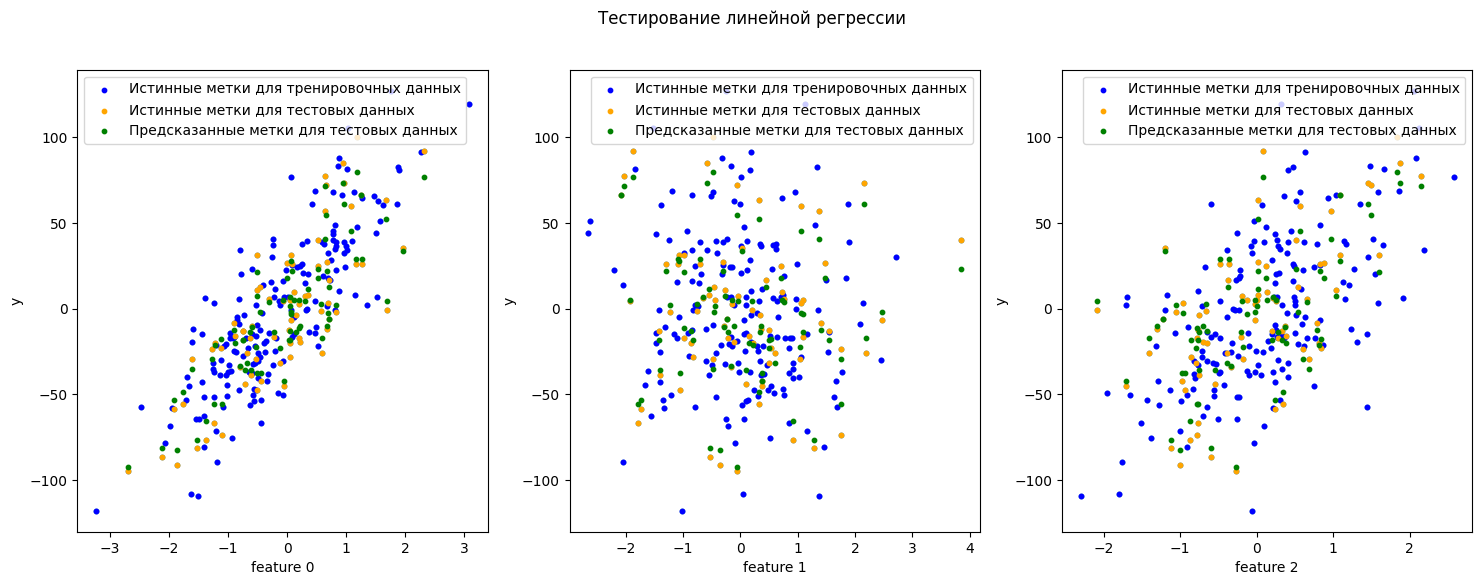

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=250, n_features=3, n_informative=2,
                       noise=5, random_state=42)
gd = GradientDescent(n_epoch=5000, alpha=0.01)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd.fit(X_train, y_train)
y_pred = gd.predict(X_test)
fig, axes =plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i in range(3):
    axes[i].scatter(X[:, i], y, s=10)
    axes[i].scatter(X_train[:, i], y_train, s=10,
                    label='Истинные метки для тренировочных данных', c='b')
    axes[i].scatter(X_test[:, i], y_test, s=10,
                    label='Истинные метки для тестовых данных', c='orange')
    axes[i].scatter(X_test[:, i], y_pred, s=10,
                    label='Предсказанные метки для тестовых данных', c='green')
    axes[i].set_xlabel(f"feature {i}")
    axes[i].set_ylabel('y')
    axes[i].legend()
fig.suptitle('Тестирование линейной регрессии')
plt.show()

In [ ]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MAE: 6.521223146246547
R2: 0.9659059024396159
